## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
housing = pd.read_csv("house_price.csv")

In [3]:
housing.drop(["yo"],axis=1,inplace=True)

In [4]:

label_enc = LabelEncoder()
housing.iloc[:,0] = label_enc.fit_transform(housing.iloc[:,0])


In [5]:
housing.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Location    1000 non-null   int32
 1   BHK         1000 non-null   int64
 2   Furnishing  1000 non-null   int64
 3   Sq.ft       1000 non-null   int64
 4   Old(years)  1000 non-null   int64
 5   Floor       1000 non-null   int64
 6   Price       1000 non-null   int64
dtypes: int32(1), int64(6)
memory usage: 50.8 KB


In [7]:
housing['Location'].value_counts()

0    504
1    496
Name: Location, dtype: int64

In [8]:
housing.describe()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.496000,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.500234,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,0.000000,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,0.000000,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,0.000000,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,1.000000,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,1.000000,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [9]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'BHK'}>,
        <AxesSubplot:title={'center':'Furnishing'}>],
       [<AxesSubplot:title={'center':'Sq.ft'}>,
        <AxesSubplot:title={'center':'Old(years)'}>,
        <AxesSubplot:title={'center':'Floor'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

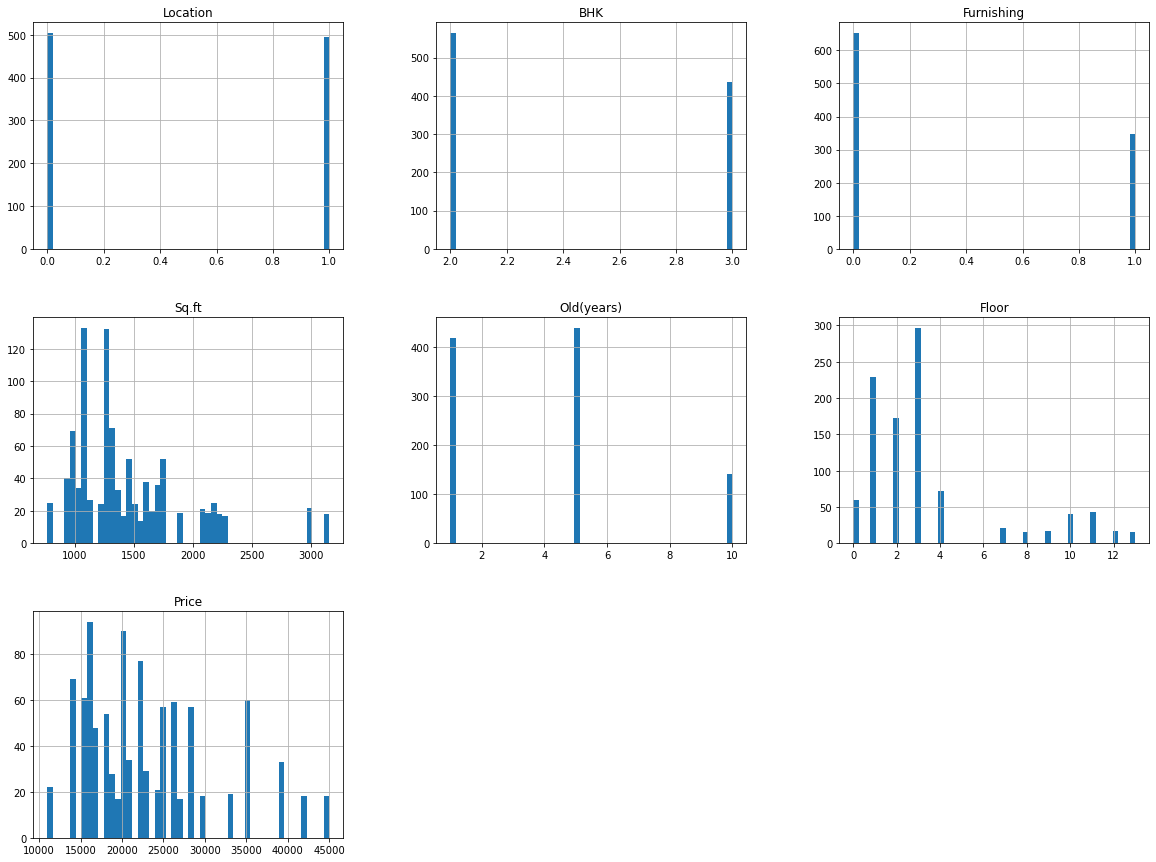

In [10]:
# # For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 800
Rows in test set: 200



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['Location']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['Location'].value_counts()

0    101
1     99
Name: Location, dtype: int64

In [14]:
strat_train_set['Location'].value_counts()

0    403
1    397
Name: Location, dtype: int64

In [15]:
housing = strat_train_set.copy()

## Looking for Correlations

In [16]:
corr_matrix = housing.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price         1.000000
Sq.ft         0.820572
BHK           0.632771
Floor         0.592378
Location      0.503749
Furnishing    0.063179
Old(years)   -0.285101
Name: Price, dtype: float64

## Trying out Attribute combinations


In [17]:
housing = strat_train_set.drop("Price", axis=1)
housing_labels = strat_train_set["Price"].copy()

In [18]:
housing_labels.head()

805    25000
538    20000
942    28000
468    16000
396    16400
Name: Price, dtype: int64

## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([

    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [20]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [21]:
housing_num_tr.shape

(800, 6)

## Selecting a desired model for Dragon Real Estates

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# model = LinearRegression()
model = DecisionTreeRegressor()
# model = RandomForestRegressor()
# model=SVC(kernel="linear",random_state=0)
# model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [23]:
some_data = housing.iloc[:5]
some_data 

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor
805,1,2,1,1245,5,1
538,0,2,1,1300,5,3
942,1,3,0,2100,1,7
468,0,2,1,767,1,3
396,1,2,0,1000,5,3


In [24]:
some_labels = housing_labels.iloc[:5]
some_labels

805    25000
538    20000
942    28000
468    16000
396    16400
Name: Price, dtype: int64

In [25]:
prepared_data = my_pipeline.transform(some_data)
prepared_data

array([[ 1.00752834, -0.87967944,  1.3971505 , -0.41094788,  0.32230404,
        -0.75844261],
       [-0.99252792, -0.87967944,  1.3971505 , -0.29979827,  0.32230404,
        -0.12475688],
       [ 1.00752834,  1.13677773, -0.71574251,  1.31692325, -0.9832313 ,
         1.14261458],
       [-0.99252792, -0.87967944,  1.3971505 , -1.37693898, -0.9832313 ,
        -0.12475688],
       [ 1.00752834, -0.87967944, -0.71574251, -0.90606884,  0.32230404,
        -0.12475688]])

In [26]:
model.predict(prepared_data)

array([25000., 20000., 28000., 16000., 16400.])

In [27]:
list(some_labels)

[25000, 20000, 28000, 16000, 16400]

## Evaluating the model

In [28]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [29]:
rmse

0.0

## Using better evaluation technique - Cross Validation

In [30]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [31]:
rmse_scores

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [33]:
print_scores(rmse_scores)

Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean:  0.0
Standard deviation:  0.0


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the model

In [34]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [35]:
X_test = strat_test_set.drop("Price", axis=1)
Y_test = strat_test_set["Price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [36]:
final_rmse

0.0

In [37]:
prepared_data[0]

array([ 1.00752834, -0.87967944,  1.3971505 , -0.41094788,  0.32230404,
       -0.75844261])

## Using the model

In [38]:
from joblib import dump, load
import numpy as np

Location=int(input("Location="))
BHK=int(input("BHK="))
Furnishing=int(input("Furnishing="))
Sq=int(input("Sq.ft="))
Old=int(input("Old(years)="))
Floor=int(input("Floor="))


model = load('Dragon.joblib') 
features = np.array([[

    Location, 
    BHK,  
    Furnishing, 
    Sq,
    Old,
    Floor
    ]])
a=model.predict(features)
print(f"CR.{a}")

Location=2
BHK=3
Furnishing=1
Sq.ft=3000
Old(years)=3
Floor=1
CR.[39000.]


In [39]:
Bommanahalli	3	1	3000	1	3	28000
43	Bommanahalli	3	1	1650	10	0	18000


SyntaxError: invalid syntax (<ipython-input-39-1980ce94ad38>, line 1)